# Title: MMA Top Fighting Camp
### By Author: Scott Taylor

In [1]:
# Which Training Camp Produces The Most Top Teir Fighters?

import csv
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

### In this next cell I am using pandas to read the data as a csv file. 

In [2]:
data = pd.read_csv('MMA_Fighters_Gyms.csv')

In [3]:
data.head(10)

,title,country,stance,reach,age,weightClass,trainingCenter,wins,loses,draws,tkos,tko wins,tko lose,subs,subs win,subs lose
0,Pete Spratt,USA,Orthodox,NaN,47.0,Lightweight,NaN,12,18,0,5 1,5,1,5 14,5,14
1,Jonny Carson,USA,NaN,NaN,NaN,Lightweight,Skrap Pack,11,7,0,2 0,2,0,6 7,6,7
2,Sergio Quinones,USA,NaN,NaN,NaN,Featherweight,NaN,11,19,0,1 5,1,5,7 9,7,9
3,Alvin Cacdac,USA,Orthodox,NaN,NaN,Flyweight,NaN,17,13,0,8 2,8,2,7 9,7,9
4,Vincent Latoel,NETHERLANDS,NaN,NaN,39.0,Featherweight,NaN,16,18,2,7 3,7,3,7 14,7,14
5,Johnny Bedford,USA,Orthodox,"71.0""",35.0,Bantamweight,Fitness Fight Factory,23,13,1,10 2,10,2,9 11,9,11
6,Tony Llamas,USA,NaN,NaN,NaN,Featherweight,Team Rampage,17,15,0,7 1,7,1,9 14,9,14
7,Joshua Burkman,USA,Orthodox,"72.0""",37.0,Welterweight,The Pit Elevated Fight Team,28,17,0,7 2,7,2,10 9,10,9
8,Marcus Hicks,CANADA,NaN,NaN,NaN,Middleweight,Jungle MMA,19,24,0,8 7,8,7,11 15,11,15
9,Pedro Rizzo,BRAZIL,Orthodox,NaN,44.0,Heavyweight,NaN,13,11,0,10 7,10,7,0 - 0,0,0


### In this cell I am creating the connection to my database, I create a table and execute my statement. 

In [4]:
import os 

if os.path.exists("TopFighters.db"):
    os.remove("TopFighters.db")
    f = open("TopFighters.db","w")
else:
    f = open("TopFighters.db","w")

conn = sqlite3.connect("TopFighters.db")
data.to_sql("TopCamps", conn, if_exists="replace")
conn.close()

/Users/scotttaylor/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2130: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


### Some Sql being used to query my data from the database.

In [5]:
db = sqlite3.connect("TopFighters.db")

df = pd.read_sql_query("SELECT * FROM TopCamps",db)
db.close()

### Here I used the Group By function to structure the "trainingCenter" from the TopCamps table 

In [6]:
db = sqlite3.connect("TopFighters.db")
bareknuckle = pd.read_sql_query('SELECT trainingCenter FROM TopCamps GROUP BY trainingCenter', db)
bareknuckle.head()

,trainingCenter
0,None
1,10th Planet Jiu-Jitsu
2,2 Knuckle Sports MMA Academy
3,4oz Fight Club
4,6ix MMA


In [7]:
db = sqlite3.connect("TopFighters.db")

fights = pd.read_sql_query('''SELECT trainingCenter, SUM("wins"), SUM("loses"), SUM("tkos") FROM TopCamps WHERE length(trainingCenter) > 0 GROUP BY trainingCenter limit 20''',db)
db.close()

### Using the pd.to_numeric dtype I am setting up the function in Pandas to convert the argument to a numeric type.

In [8]:
fights["wins"] = pd.to_numeric(fights['SUM("wins")'])
fights["loses"] = pd.to_numeric(fights['SUM("loses")'])

### This graph shows that AKA(America Kickboxing Academy) is the dominant fighting camp when calculating the win to lose ratio.

Text(0.5, 1.0, 'TrainingCenter_Wins/Loses')

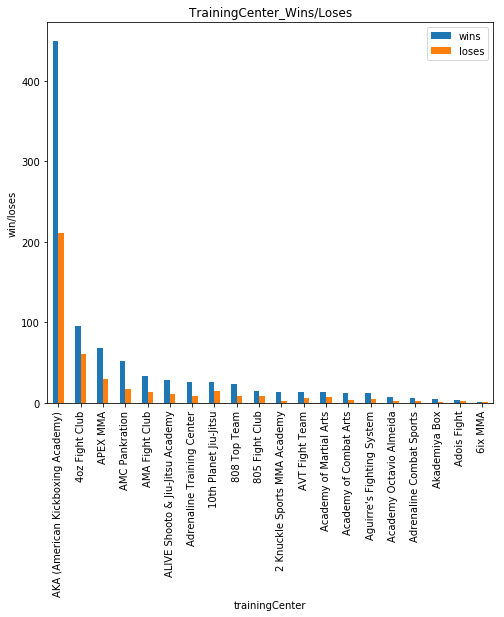

In [9]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 7
fights = fights.sort_values("wins",ascending = False).reset_index(drop=True)
fights.plot(x="trainingCenter", y=["wins", "loses"],kind="bar")
plt.ylabel("win/loses")
plt.title("TrainingCenter_Wins/Loses")

In [10]:
fights.describe()

,"SUM(""wins"")","SUM(""loses"")","SUM(""tkos"")",wins,loses
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,45.400000,21.050000,16.400000,45.400000,21.050000
std,98.115614,46.736073,38.628323,98.115614,46.736073
min,1.000000,1.000000,0.000000,1.000000,1.000000
25%,10.750000,3.000000,2.750000,10.750000,3.000000
50%,14.500000,7.500000,6.500000,14.500000,7.500000
75%,30.000000,14.250000,12.000000,30.000000,14.250000
max,450.000000,211.000000,177.000000,450.000000,211.000000


### This section displays the use of the '!=""' 'ORDER BY' to order the trainingCenters in descending order and take all the null values out of the running.  

In [11]:
db = sqlite3.connect("TopFighters.db")

wins = pd.read_sql_query('''SELECT trainingCenter FROM TopCamps WHERE TrainingCenter !="" ORDER BY wins DESC, trainingCenter DESC''',db)
wins.head(20)

,trainingCenter
0,Rusfighters Sport Club
1,K Dojo
2,Victory MMA
3,Tiger Muay Thai
4,American Top Team
5,MMA LAB
6,FightSpirit Team
7,Team Voodoo
8,Finney's HIT Squad
9,TriStar Gym


In [12]:
db = sqlite3.connect("TopFighters.db")

victory = pd.read_sql_query('''SELECT trainingCenter, SUM("wins") FROM TopCamps WHERE trainingCenter != "" GROUP BY trainingCenter ORDER BY wins DESC LIMIT 20;''',db)
db.close()


In [13]:
victory["wins"] = pd.to_numeric(fights['SUM("wins")'])

### In this section we visualize the victiories(sum(wins)) and plot them with a bar graph. 

Text(0.5, 1.0, 'TrainingCenter_Victory')

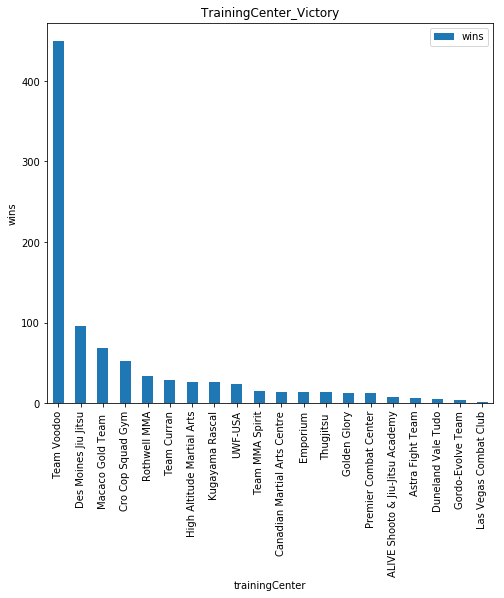

In [14]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 7
victory = victory.sort_values("wins",ascending = False).reset_index(drop=True)
victory.plot(x="trainingCenter", y=["wins"], kind="bar")
plt.ylabel("wins")
plt.title("TrainingCenter_Victory")

### I used the "Group BY" and "ORDER BY" together in this cell to show the trainingCenters loses. 

In [15]:
db = sqlite3.connect("TopFighters.db")

loses = pd.read_sql_query('''SELECT trainingCenter, loses FROM TopCamps WHERE trainingCenter !="" GROUP BY trainingCenter ORDER BY loses DESC LIMIT 20;''',db)
print(loses)

                 trainingCenter  loses
0                  Golden Glory     32
1          Des Moines Jiu Jitsu     24
2                    Jungle MMA     24
3                   Team Voodoo     23
4    High Altitude Martial Arts     19
5             Macaco Gold Team      19
6                   Team Curran     18
7   The Pit Elevated Fight Team     17
8         Las Vegas Combat Club     16
9                 Ma Du Academy     16
10         Pure Fitness and MMA     16
11            Team Jorge Gurgel     16
12                   Thugjitsu      16
13       United Training Center     16
14                 Caveman Crew     15
15                 Country Club     15
16           Duneland Vale Tudo     15
17                 Flawless MMA     15
18              Kugayama Rascal     15
19         Reality Self Defense     15


In [16]:
db = sqlite3.connect("TopFighters.db")

defeats = pd.read_sql_query('''SELECT trainingCenter, SUM("loses") FROM TopCamps WHERE length(trainingCenter) > 0 GROUP BY trainingCenter limit 20''',db)
db.close()

### This bar graph shows the sum of the loses.

In [17]:
defeats["loses"] = pd.to_numeric(fights['SUM("loses")'])

Text(0.5, 1.0, 'TrainingCenter_Loses')

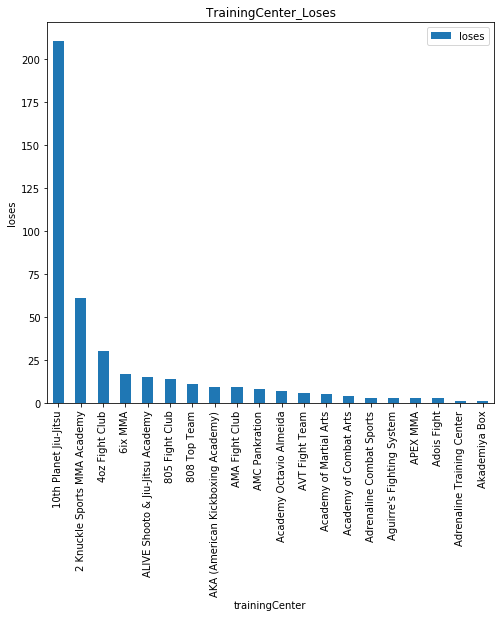

In [18]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 7
defeats = defeats.sort_values("loses",ascending = False).reset_index(drop=True)
defeats.plot(x="trainingCenter", y=["loses"], kind="bar")
plt.ylabel("loses")
plt.title("TrainingCenter_Loses")

In [19]:
db = sqlite3.connect("TopFighters.db")

tkos = pd.read_sql_query('''SELECT trainingCenter, tkos FROM TopCamps Where trainingCenter!="" GROUP BY trainingCenter ORDER BY tkos DESC LIMIT 20;''',db)
tkos.head(20)

,trainingCenter,tkos
0,SBG Manchester,9 6
1,Daddis Fight Camps,9 4
2,Team Voodoo,9 4
3,Sports Lab,9 3
4,Total MMA Studios,9 3
5,Aguirre's Fighting System,9 2
6,Scottish Hit Squad,9 2
7,Strike MMA,9 2
8,Third Column,9 2
9,Janjira Muay Thai,9 1


In [20]:
db = sqlite3.connect("TopFighters.db")

knockouts = pd.read_sql_query('''SELECT trainingCenter,  SUM("tkos") FROM TopCamps WHERE length(trainingCenter) > 0 GROUP BY trainingCenter limit 20''',db)
db.close()

In [21]:
knockouts["tkos"] = pd.to_numeric(fights['SUM("tkos")'])

Text(0.5, 1.0, 'TrainingCenter_Wins_By_TKOS')

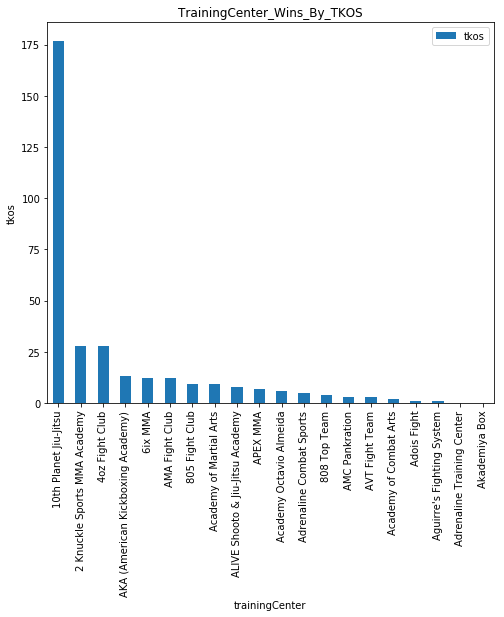

In [22]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 7
knockouts = knockouts.sort_values("tkos",ascending = False).reset_index(drop=True)
knockouts.plot(x="trainingCenter", y=["tkos"], kind="bar")
plt.ylabel("tkos")
plt.title("TrainingCenter_Wins_By_TKOS")

### Of the wins from the top trainingCenter this pie chart shows the SUMtkos percentage of wins

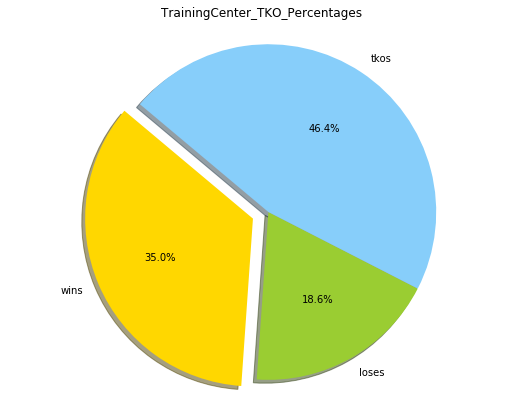

In [23]:
labels = "wins", "loses", "tkos"
sizes = [245, 130, 325]
colors = ["gold", "yellowgreen", "lightskyblue"]
explode = (0.1, 0, 0)  # explode 1st slice

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 7
    
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct="%1.1f%%", shadow=True, startangle=140)
 
plt.axis("equal")
plt.title("TrainingCenter_TKO_Percentages")
plt.show()